Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257


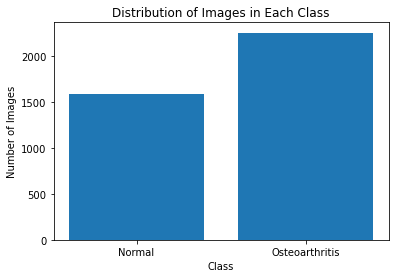

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Create a histogram to visualize the distribution of images in each class
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


2024-03-28 17:44:45.841896: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-28 17:44:46.021379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 17:44:46.021415: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 17:44:46.052751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 17:44:46.117019: I tensorflow/core/platform/cpu_feature_guar

Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257
Number of images in Normal class after augmentation: 2257


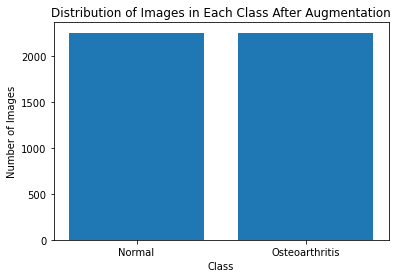

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define a function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Check if data augmentation is needed
if len(normal_images) < len(osteoarthritis_images):
    # Calculate the number of additional images needed
    num_additional_images = len(osteoarthritis_images) - len(normal_images)

    # Create an ImageDataGenerator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Choose random indices from the "Normal" class for augmentation
    sampled_indices = np.random.randint(0, len(normal_images), size=num_additional_images)

    # Perform data augmentation and append augmented images to the "Normal" class
    for index in sampled_indices:
        img = normal_images[index]
        img = img.reshape((1,) + img.shape)  # Reshape for flow() function
        for batch in datagen.flow(img, batch_size=1):
            normal_images.append(batch[0])  # Append augmented images
            break  # Exit the loop after one iteration of data augmentation

    # Display the number of images in the "Normal" class after augmentation
    print("Number of images in Normal class after augmentation:", len(normal_images))

# Create a histogram to visualize the distribution of images in each class after augmentation
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class After Augmentation')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [3]:
import random

# Set a seed for reproducibility
random.seed(42)

# Randomly select 1000 images from each class
selected_normal_images = random.sample(normal_images, 2000)
selected_osteoarthritis_images = random.sample(osteoarthritis_images, 2000)

# Combine selected images from both classes
selected_images = selected_normal_images + selected_osteoarthritis_images
labels = [0] * 2000 + [1] * 2000  # Assign labels (0 for Normal, 1 for Osteoarthritis)

# Split the selected images and labels into train and test sets (70:30 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_images, labels, test_size=0.3, random_state=42)

# Split the train set into train and validation sets (80:20 ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the sizes of train, test, and validation sets
print("X_train size:", len(X_train))
print("X_test size:", len(X_test))
print("X_validation size:", len(X_val))


X_train size: 2240
X_test size: 1200
X_validation size: 560


In [4]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score,balanced_accuracy_score,matthews_corrcoef

VGG16

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
# Define a function to preprocess images
def preprocess_images(images):
    processed_images = []
    for img in images:
        # Resize image to (224, 224)
        resized_img = cv2.resize(img, (224, 224))
        # Convert the image to array and apply preprocessing specific to VGG16
        processed_img = preprocess_input(resized_img)
        processed_images.append(processed_img)
    return np.array(processed_images)

X_train=np.array(X_train)
X_test=np.array(X_test)
X_val=np.array(X_val)
# Preprocess train, validation, and test images
X_train_preprocessed = preprocess_images(X_train)
X_val_preprocessed = preprocess_images(X_val)
X_test_preprocessed = preprocess_images(X_test)


In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
70/70 [==============================] - 101s 1s/step - loss: 0.4258 - accuracy: 0.8085 - val_loss: 0.4305 - val_accuracy: 0.8018
Epoch 2/50
70/70 [==============================] - 104s 1s/step - loss: 0.3849 - accuracy: 0.8353 - val_loss: 0.4062 - val_accuracy: 0.8018
Epoch 3/50
70/70 [==============================] - 104s 1s/step - loss: 0.3654 - accuracy: 0.8429 - val_loss: 0.3859 - val_accuracy: 0.8250
Epoch 4/50
70/70 [==============================] - 104s 1s/step - loss: 0.3380 - accuracy: 0.8491 - val_loss: 0.3759 - val_accuracy: 0.8179
Epoch 5/50
70/70 [==============================] - 104s 1s/step - loss: 0.3244 - accuracy: 0.8634 - val_loss: 0.3613 - val_accuracy: 0.8411
Epoch 6/50
70/70 [==============================] - 104s 1s/step - loss: 0.3112 - accuracy: 0.8679 - val_loss: 0.3592 - val_accuracy: 0.8268
Epoch 7/50
70/70 [==============================] - 104s 1s/step - loss: 0.2984 - accuracy: 0.8728 - val_loss: 0.3541 - val_accuracy: 0.8429
Epoch 8/50
70

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


38/38 [==============================] - 45s 1s/step


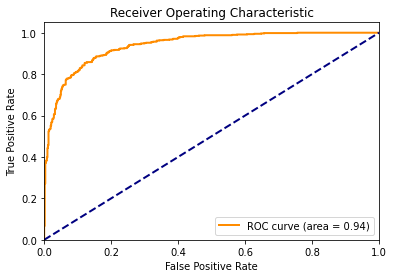

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3195092832079068
Validation Loss: 0.306632719705095
Training Time (seconds): 3947.5787177085876
Inference Time (seconds): 45.538774251937866
Validation Accuracy: 0.8571428571428571
Test Accuracy: 0.8616666666666667
Confusion Matrix:
 [[526  96]
 [ 70 508]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       622
           1       0.84      0.88      0.86       578

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

ROC AUC Score: 0.9394380222298869
Metrics saved successfully


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
70/70 [==============================] - 93s 1s/step - loss: 0.6816 - accuracy: 0.6049 - val_loss: 0.5599 - val_accuracy: 0.7268
Epoch 2/100
70/70 [==============================] - 105s 2s/step - loss: 0.4895 - accuracy: 0.7616 - val_loss: 0.4765 - val_accuracy: 0.7679
Epoch 3/100
70/70 [==============================] - 105s 2s/step - loss: 0.4172 - accuracy: 0.8071 - val_loss: 0.4406 - val_accuracy: 0.7750
Epoch 4/100
70/70 [==============================] - 105s 2s/step - loss: 0.3794 - accuracy: 0.8339 - val_loss: 0.4183 - val_accuracy: 0.7893
Epoch 5/100
70/70 [==============================] - 105s 2s/step - loss: 0.3552 - accuracy: 0.8482 - val_loss: 0.3981 - val_accuracy: 0.8071
Epoch 6/100
70/70 [==============================] - 105s 2s/step - loss: 0.3317 - accuracy: 0.8652 - val_loss: 0.3832 - val_accuracy: 0.8286
Epoch 7/100
70/70 [==============================] - 105s 2s/step - loss: 0.3154 - accuracy: 0.8710 - val_loss: 0.3712 - val_accuracy: 0.8232
Epoch 8

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


38/38 [==============================] - 45s 1s/step


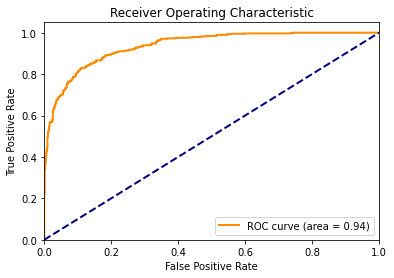

18/18 [==============================] - 21s 1s/step
Test Loss: 0.32048499037470735
Validation Loss: 0.326122758033319
Training Time (seconds): 3354.4160742759705
Inference Time (seconds): 45.37398815155029
Validation Accuracy: 0.8553571428571428
Test Accuracy: 0.8525
Confusion Matrix:
 [[526  96]
 [ 81 497]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       622
           1       0.84      0.86      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9365285550573549
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
70/70 [==============================] - 106s 2s/step - loss: 0.1761 - accuracy: 0.9446 - val_loss: 0.3271 - val_accuracy: 0.8589
Epoch 2/150
70/70 [==============================] - 105s 2s/step - loss: 0.1706 - accuracy: 0.9460 - val_loss: 0.3385 - val_accuracy: 0.8536
Epoch 3/150
70/70 [==============================] - 105s 2s/step - loss: 0.1727 - accuracy: 0.9429 - val_loss: 0.3388 - val_accuracy: 0.8518
Epoch 4/150
70/70 [==============================] - 105s 2s/step - loss: 0.1648 - accuracy: 0.9460 - val_loss: 0.3487 - val_accuracy: 0.8429
Epoch 5/150
70/70 [==============================] - 105s 2s/step - loss: 0.1600 - accuracy: 0.9496 - val_loss: 0.3342 - val_accuracy: 0.8554
Epoch 6/150
70/70 [==============================] - 105s 2s/step - loss: 0.1577 - accuracy: 0.9513 - val_loss: 0.3352 - val_accuracy: 0.8518
Training Time: 632.0836548805237 seconds


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


38/38 [==============================] - 45s 1s/step


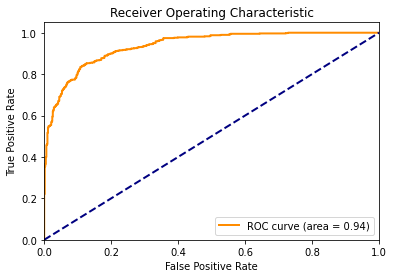

18/18 [==============================] - 21s 1s/step
Test Loss: 0.32078821860614665
Validation Loss: 0.32710352774586604
Training Time (seconds): 632.0836548805237
Inference Time (seconds): 45.92892289161682
Validation Accuracy: 0.8589285714285714
Test Accuracy: 0.8516666666666667
Confusion Matrix:
 [[521 101]
 [ 77 501]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       622
           1       0.83      0.87      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9373518841998687
Metrics saved successfully


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
70/70 [==============================] - 106s 2s/step - loss: 0.1724 - accuracy: 0.9451 - val_loss: 0.3556 - val_accuracy: 0.8429
Epoch 2/200
70/70 [==============================] - 105s 2s/step - loss: 0.1732 - accuracy: 0.9411 - val_loss: 0.3326 - val_accuracy: 0.8518
Epoch 3/200
70/70 [==============================] - 105s 2s/step - loss: 0.1659 - accuracy: 0.9482 - val_loss: 0.3371 - val_accuracy: 0.8554
Epoch 4/200
70/70 [==============================] - 105s 2s/step - loss: 0.1616 - accuracy: 0.9478 - val_loss: 0.3270 - val_accuracy: 0.8589
Epoch 5/200
70/70 [==============================] - 105s 2s/step - loss: 0.1605 - accuracy: 0.9433 - val_loss: 0.3341 - val_accuracy: 0.8536
Epoch 6/200
70/70 [==============================] - 106s 2s/step - loss: 0.1530 - accuracy: 0.9558 - val_loss: 0.3298 - val_accuracy: 0.8500
Epoch 7/200
70/70 [==============================] - 105s 2s/step - loss: 0.1521 - accuracy: 0.9504 - val_loss: 0.3422 - val_accuracy: 0.8607
Epoch 

38/38 [==============================] - 45s 1s/step


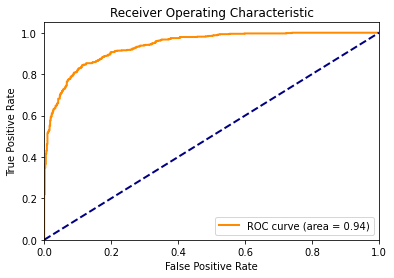

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3186305100256479
Validation Loss: 0.32701934324187504
Training Time (seconds): 949.2320609092712
Inference Time (seconds): 45.15814232826233
Validation Accuracy: 0.8589285714285714
Test Accuracy: 0.8541666666666666
Confusion Matrix:
 [[526  96]
 [ 79 499]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       622
           1       0.84      0.86      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9382364067245963
Metrics saved successfully


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Dense

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
x = Dense(128, activation='relu')(x)   # Additional dense layer
x = Dense(64, activation='relu')(x)    # Additional dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
70/70 [==============================] - 106s 2s/step - loss: 0.7278 - accuracy: 0.6393 - val_loss: 0.5487 - val_accuracy: 0.7464
Epoch 2/50
70/70 [==============================] - 105s 2s/step - loss: 0.4941 - accuracy: 0.7754 - val_loss: 0.4647 - val_accuracy: 0.7804
Epoch 3/50
70/70 [==============================] - 105s 2s/step - loss: 0.4264 - accuracy: 0.8094 - val_loss: 0.4288 - val_accuracy: 0.7929
Epoch 4/50
70/70 [==============================] - 105s 2s/step - loss: 0.3860 - accuracy: 0.8228 - val_loss: 0.4056 - val_accuracy: 0.7946
Epoch 5/50
70/70 [==============================] - 105s 2s/step - loss: 0.3461 - accuracy: 0.8540 - val_loss: 0.3750 - val_accuracy: 0.8161
Epoch 6/50
70/70 [==============================] - 105s 2s/step - loss: 0.3227 - accuracy: 0.8647 - val_loss: 0.3784 - val_accuracy: 0.8036
Epoch 7/50
70/70 [==============================] - 105s 2s/step - loss: 0.2998 - accuracy: 0.8701 - val_loss: 0.4154 - val_accuracy: 0.8000
Epoch 8/50
70

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


38/38 [==============================] - 45s 1s/step


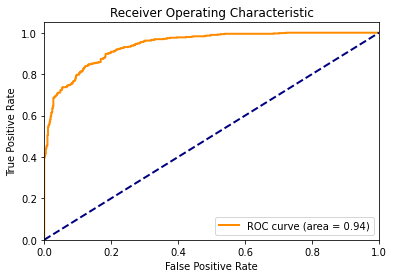

18/18 [==============================] - 21s 1s/step
Test Loss: 0.31284645250609355
Validation Loss: 0.3224198438637679
Training Time (seconds): 2213.592791557312
Inference Time (seconds): 45.55825209617615
Validation Accuracy: 0.8517857142857143
Test Accuracy: 0.8483333333333334
Confusion Matrix:
 [[523  99]
 [ 83 495]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       622
           1       0.83      0.86      0.84       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9405923519398304
Metrics saved successfully


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [21]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
70/70 [==============================] - 106s 2s/step - loss: 0.1583 - accuracy: 0.9482 - val_loss: 0.3299 - val_accuracy: 0.8536
Epoch 2/100
70/70 [==============================] - 106s 2s/step - loss: 0.1472 - accuracy: 0.9527 - val_loss: 0.3301 - val_accuracy: 0.8500
Epoch 3/100
70/70 [==============================] - 105s 2s/step - loss: 0.1423 - accuracy: 0.9545 - val_loss: 0.3426 - val_accuracy: 0.8411
Epoch 4/100
70/70 [==============================] - 106s 2s/step - loss: 0.1311 - accuracy: 0.9603 - val_loss: 0.3457 - val_accuracy: 0.8375
Epoch 5/100
70/70 [==============================] - 105s 2s/step - loss: 0.1185 - accuracy: 0.9692 - val_loss: 0.3338 - val_accuracy: 0.8500
Epoch 6/100
70/70 [==============================] - 106s 2s/step - loss: 0.1141 - accuracy: 0.9688 - val_loss: 0.3376 - val_accuracy: 0.8464
Training Time: 633.8236949443817 seconds


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


38/38 [==============================] - 45s 1s/step


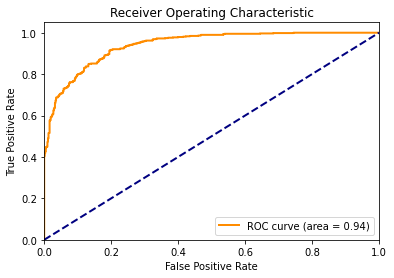

18/18 [==============================] - 21s 1s/step
Test Loss: 0.32059707553288397
Validation Loss: 0.32987318234469337
Training Time (seconds): 633.8236949443817
Inference Time (seconds): 45.906880378723145
Validation Accuracy: 0.8535714285714285
Test Accuracy: 0.8516666666666667
Confusion Matrix:
 [[518 104]
 [ 74 504]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       622
           1       0.83      0.87      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9402891665461341
Metrics saved successfully


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
70/70 [==============================] - 94s 1s/step - loss: 0.7369 - accuracy: 0.6313 - val_loss: 0.5473 - val_accuracy: 0.7321
Epoch 2/150
70/70 [==============================] - 105s 2s/step - loss: 0.4875 - accuracy: 0.7732 - val_loss: 0.4657 - val_accuracy: 0.7768
Epoch 3/150
70/70 [==============================] - 106s 2s/step - loss: 0.4167 - accuracy: 0.8250 - val_loss: 0.4279 - val_accuracy: 0.7750
Epoch 4/150
70/70 [==============================] - 105s 2s/step - loss: 0.3696 - accuracy: 0.8371 - val_loss: 0.4312 - val_accuracy: 0.7661
Epoch 5/150
70/70 [==============================] - 106s 2s/step - loss: 0.3455 - accuracy: 0.8473 - val_loss: 0.3718 - val_accuracy: 0.8196
Epoch 6/150
70/70 [==============================] - 106s 2s/step - loss: 0.3121 - accuracy: 0.8710 - val_loss: 0.3769 - val_accuracy: 0.7946
Epoch 7/150
70/70 [==============================] - 106s 2s/step - loss: 0.2920 - accuracy: 0.8795 - val_loss: 0.3558 - val_accuracy: 0.8107
Epoch 8

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


38/38 [==============================] - 45s 1s/step


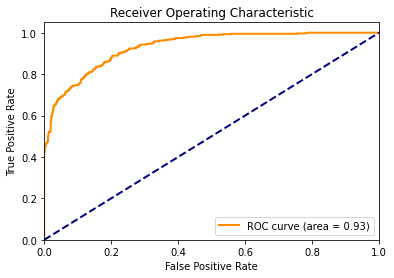

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3290399202237114
Validation Loss: 0.32630154990286214
Training Time (seconds): 1676.1539421081543
Inference Time (seconds): 45.24898099899292
Validation Accuracy: 0.8464285714285714
Test Accuracy: 0.8358333333333333
Confusion Matrix:
 [[534  88]
 [109 469]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       622
           1       0.84      0.81      0.83       578

    accuracy                           0.84      1200
   macro avg       0.84      0.83      0.84      1200
weighted avg       0.84      0.84      0.84      1200

ROC AUC Score: 0.9315218237853115
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
70/70 [==============================] - 106s 2s/step - loss: 0.2131 - accuracy: 0.9138 - val_loss: 0.3402 - val_accuracy: 0.8214
Epoch 2/200
70/70 [==============================] - 105s 2s/step - loss: 0.1998 - accuracy: 0.9277 - val_loss: 0.3347 - val_accuracy: 0.8411
Epoch 3/200
70/70 [==============================] - 105s 2s/step - loss: 0.1911 - accuracy: 0.9232 - val_loss: 0.3281 - val_accuracy: 0.8518
Epoch 4/200
70/70 [==============================] - 105s 2s/step - loss: 0.1770 - accuracy: 0.9339 - val_loss: 0.3422 - val_accuracy: 0.8268
Epoch 5/200
70/70 [==============================] - 105s 2s/step - loss: 0.1679 - accuracy: 0.9362 - val_loss: 0.3221 - val_accuracy: 0.8518
Epoch 6/200
70/70 [==============================] - 105s 2s/step - loss: 0.1564 - accuracy: 0.9513 - val_loss: 0.3503 - val_accuracy: 0.8321
Epoch 7/200
70/70 [==============================] - 105s 2s/step - loss: 0.1418 - accuracy: 0.9540 - val_loss: 0.3397 - val_accuracy: 0.8286
Epoch 

38/38 [==============================] - 45s 1s/step


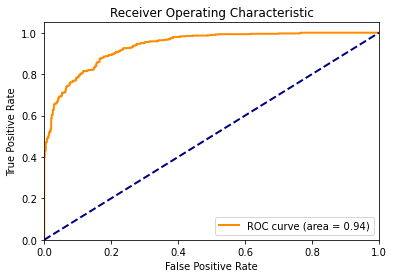

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3231644598055501
Validation Loss: 0.3220611608048348
Training Time (seconds): 1053.9817082881927
Inference Time (seconds): 45.57669115066528
Validation Accuracy: 0.8517857142857143
Test Accuracy: 0.8408333333333333
Confusion Matrix:
 [[527  95]
 [ 96 482]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       622
           1       0.84      0.83      0.83       578

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.84      0.84      0.84      1200

ROC AUC Score: 0.9367260427908635
Metrics saved successfully


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Dense+Dropout

In [7]:
from tensorflow.keras.layers import Dropout

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
x = Dropout(0.5)(x)  # Dropout layer with 50% dropout rate
x = Dense(128, activation='relu')(x)  # Additional dense layer
predictions = Dense(1, activation='sigmoid')(x)   # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
70/70 [==============================] - 106s 2s/step - loss: 0.8712 - accuracy: 0.5612 - val_loss: 0.6071 - val_accuracy: 0.6571
Epoch 2/50
70/70 [==============================] - 105s 2s/step - loss: 0.6779 - accuracy: 0.6411 - val_loss: 0.5578 - val_accuracy: 0.6911
Epoch 3/50
70/70 [==============================] - 105s 2s/step - loss: 0.5874 - accuracy: 0.6969 - val_loss: 0.5135 - val_accuracy: 0.7304
Epoch 4/50
70/70 [==============================] - 105s 2s/step - loss: 0.5531 - accuracy: 0.7263 - val_loss: 0.4801 - val_accuracy: 0.7554
Epoch 5/50
70/70 [==============================] - 105s 2s/step - loss: 0.5208 - accuracy: 0.7464 - val_loss: 0.4791 - val_accuracy: 0.7446
Epoch 6/50
70/70 [==============================] - 105s 2s/step - loss: 0.4959 - accuracy: 0.7522 - val_loss: 0.4475 - val_accuracy: 0.7696
Epoch 7/50
70/70 [==============================] - 105s 2s/step - loss: 0.4668 - accuracy: 0.7705 - val_loss: 0.4318 - val_accuracy: 0.7804
Epoch 8/50
70

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


38/38 [==============================] - 45s 1s/step


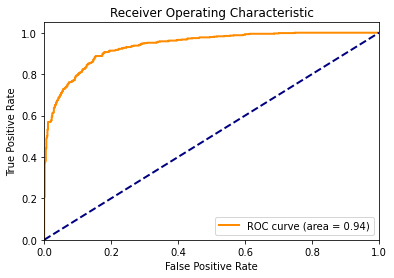

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3232434063767669
Validation Loss: 0.3303374438251407
Training Time (seconds): 3583.8523333072662
Inference Time (seconds): 45.54855036735535
Validation Accuracy: 0.8535714285714285
Test Accuracy: 0.86
Confusion Matrix:
 [[519 103]
 [ 65 513]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       622
           1       0.83      0.89      0.86       578

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

ROC AUC Score: 0.9372879093002815
Metrics saved successfully


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
70/70 [==============================] - 105s 2s/step - loss: 0.2512 - accuracy: 0.9009 - val_loss: 0.3395 - val_accuracy: 0.8321
Epoch 2/100
70/70 [==============================] - 105s 2s/step - loss: 0.2585 - accuracy: 0.8844 - val_loss: 0.3337 - val_accuracy: 0.8411
Epoch 3/100
70/70 [==============================] - 105s 2s/step - loss: 0.2546 - accuracy: 0.8884 - val_loss: 0.3383 - val_accuracy: 0.8321
Epoch 4/100
70/70 [==============================] - 105s 2s/step - loss: 0.2486 - accuracy: 0.8938 - val_loss: 0.3281 - val_accuracy: 0.8500
Epoch 5/100
70/70 [==============================] - 106s 2s/step - loss: 0.2384 - accuracy: 0.9013 - val_loss: 0.3333 - val_accuracy: 0.8607
Epoch 6/100
70/70 [==============================] - 105s 2s/step - loss: 0.2486 - accuracy: 0.9004 - val_loss: 0.3319 - val_accuracy: 0.8554
Epoch 7/100
70/70 [==============================] - 105s 2s/step - loss: 0.2353 - accuracy: 0.9036 - val_loss: 0.3279 - val_accuracy: 0.8500
Epoch 

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 45s 1s/step


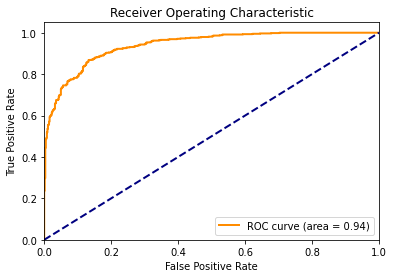

18/18 [==============================] - 21s 1s/step
Test Loss: 0.31547351142248603
Validation Loss: 0.3279352085624321
Training Time (seconds): 1265.5441749095917
Inference Time (seconds): 45.90092444419861
Validation Accuracy: 0.85
Test Accuracy: 0.8625
Confusion Matrix:
 [[529  93]
 [ 72 506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       622
           1       0.84      0.88      0.86       578

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

ROC AUC Score: 0.9396911403108623
Metrics saved successfully


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
70/70 [==============================] - 93s 1s/step - loss: 0.8868 - accuracy: 0.5576 - val_loss: 0.5801 - val_accuracy: 0.7089
Epoch 2/150
70/70 [==============================] - 104s 1s/step - loss: 0.6811 - accuracy: 0.6397 - val_loss: 0.5311 - val_accuracy: 0.7125
Epoch 3/150
70/70 [==============================] - 104s 1s/step - loss: 0.5876 - accuracy: 0.7027 - val_loss: 0.4942 - val_accuracy: 0.7339
Epoch 4/150
70/70 [==============================] - 104s 1s/step - loss: 0.5475 - accuracy: 0.7268 - val_loss: 0.4876 - val_accuracy: 0.7446
Epoch 5/150
70/70 [==============================] - 104s 1s/step - loss: 0.5094 - accuracy: 0.7487 - val_loss: 0.4716 - val_accuracy: 0.7768
Epoch 6/150
70/70 [==============================] - 104s 1s/step - loss: 0.4830 - accuracy: 0.7549 - val_loss: 0.4621 - val_accuracy: 0.7607
Epoch 7/150
70/70 [==============================] - 104s 1s/step - loss: 0.4597 - accuracy: 0.7781 - val_loss: 0.4338 - val_accuracy: 0.7804
Epoch 8

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 44s 1s/step


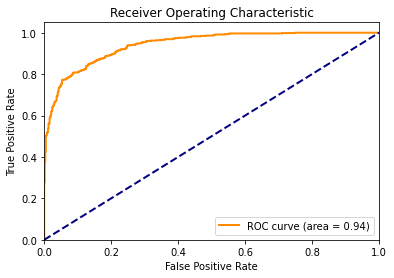

18/18 [==============================] - 21s 1s/step
Test Loss: 0.30880018623054817
Validation Loss: 0.3325429914662246
Training Time (seconds): 4561.44208407402
Inference Time (seconds): 44.67075538635254
Validation Accuracy: 0.8482142857142857
Test Accuracy: 0.8541666666666666
Confusion Matrix:
 [[526  96]
 [ 79 499]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       622
           1       0.84      0.86      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9418968835879349
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
70/70 [==============================] - 104s 1s/step - loss: 0.2322 - accuracy: 0.8987 - val_loss: 0.3361 - val_accuracy: 0.8321
Epoch 2/200
70/70 [==============================] - 105s 1s/step - loss: 0.2280 - accuracy: 0.9067 - val_loss: 0.3329 - val_accuracy: 0.8482
Epoch 3/200
70/70 [==============================] - 104s 1s/step - loss: 0.2198 - accuracy: 0.9089 - val_loss: 0.3345 - val_accuracy: 0.8536
Epoch 4/200
70/70 [==============================] - 104s 1s/step - loss: 0.2125 - accuracy: 0.9103 - val_loss: 0.3379 - val_accuracy: 0.8393
Epoch 5/200
70/70 [==============================] - 104s 1s/step - loss: 0.2085 - accuracy: 0.9147 - val_loss: 0.3355 - val_accuracy: 0.8482
Epoch 6/200
70/70 [==============================] - 104s 1s/step - loss: 0.2008 - accuracy: 0.9170 - val_loss: 0.3406 - val_accuracy: 0.8500
Epoch 7/200
70/70 [==============================] - 104s 1s/step - loss: 0.2132 - accuracy: 0.9121 - val_loss: 0.3352 - val_accuracy: 0.8536
Traini

38/38 [==============================] - 45s 1s/step


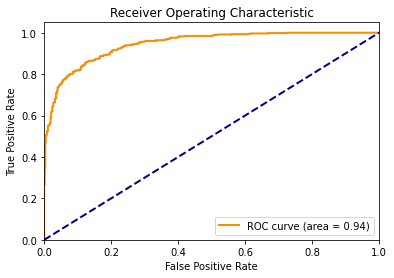

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3051801676547294
Validation Loss: 0.33285335783830333
Training Time (seconds): 729.0545706748962
Inference Time (seconds): 45.11565542221069
Validation Accuracy: 0.8482142857142857
Test Accuracy: 0.8558333333333333
Confusion Matrix:
 [[519 103]
 [ 70 508]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       622
           1       0.83      0.88      0.85       578

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

ROC AUC Score: 0.9444781317104107
Metrics saved successfully


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+GlobalAveragePooling+Dense

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)  # Additional Dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
70/70 [==============================] - 104s 1s/step - loss: 0.6617 - accuracy: 0.6348 - val_loss: 0.5305 - val_accuracy: 0.7554
Epoch 2/50
70/70 [==============================] - 104s 1s/step - loss: 0.4757 - accuracy: 0.7893 - val_loss: 0.4593 - val_accuracy: 0.7929
Epoch 3/50
70/70 [==============================] - 104s 1s/step - loss: 0.4073 - accuracy: 0.8272 - val_loss: 0.4177 - val_accuracy: 0.7982
Epoch 4/50
70/70 [==============================] - 104s 1s/step - loss: 0.3636 - accuracy: 0.8473 - val_loss: 0.3975 - val_accuracy: 0.8054
Epoch 5/50
70/70 [==============================] - 104s 1s/step - loss: 0.3396 - accuracy: 0.8513 - val_loss: 0.3832 - val_accuracy: 0.8018
Epoch 6/50
70/70 [==============================] - 104s 1s/step - loss: 0.3132 - accuracy: 0.8754 - val_loss: 0.3720 - val_accuracy: 0.8250
Epoch 7/50
70/70 [==============================] - 104s 1s/step - loss: 0.2971 - accuracy: 0.8817 - val_loss: 0.3692 - val_accuracy: 0.8125
Epoch 8/50
70

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 45s 1s/step


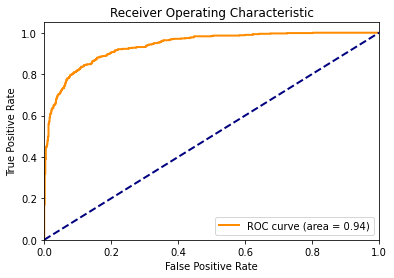

18/18 [==============================] - 21s 1s/step
Test Loss: 0.32080276477574443
Validation Loss: 0.32782987210032183
Training Time (seconds): 2492.505820274353
Inference Time (seconds): 44.87385416030884
Validation Accuracy: 0.85
Test Accuracy: 0.8575
Confusion Matrix:
 [[527  95]
 [ 76 502]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       622
           1       0.84      0.87      0.85       578

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

ROC AUC Score: 0.9383142892110503
Metrics saved successfully


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
70/70 [==============================] - 104s 1s/step - loss: 0.1567 - accuracy: 0.9460 - val_loss: 0.3782 - val_accuracy: 0.8214
Epoch 2/100
70/70 [==============================] - 104s 1s/step - loss: 0.1576 - accuracy: 0.9509 - val_loss: 0.3613 - val_accuracy: 0.8304
Epoch 3/100
70/70 [==============================] - 104s 1s/step - loss: 0.1466 - accuracy: 0.9518 - val_loss: 0.3301 - val_accuracy: 0.8536
Epoch 4/100
70/70 [==============================] - 104s 1s/step - loss: 0.1381 - accuracy: 0.9571 - val_loss: 0.3358 - val_accuracy: 0.8482
Epoch 5/100
70/70 [==============================] - 104s 1s/step - loss: 0.1324 - accuracy: 0.9607 - val_loss: 0.3310 - val_accuracy: 0.8571
Epoch 6/100
70/70 [==============================] - 104s 1s/step - loss: 0.1255 - accuracy: 0.9643 - val_loss: 0.3425 - val_accuracy: 0.8500
Epoch 7/100
70/70 [==============================] - 104s 1s/step - loss: 0.1222 - accuracy: 0.9674 - val_loss: 0.3722 - val_accuracy: 0.8429
Epoch 

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 44s 1s/step


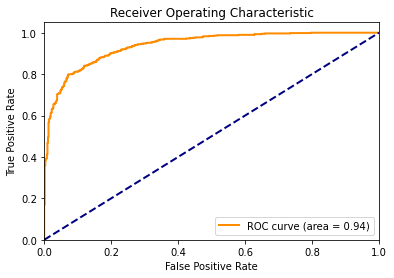

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3302846090903047
Validation Loss: 0.33008897227141587
Training Time (seconds): 831.5907092094421
Inference Time (seconds): 45.94842290878296
Validation Accuracy: 0.8535714285714285
Test Accuracy: 0.8508333333333333
Confusion Matrix:
 [[511 111]
 [ 68 510]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       622
           1       0.82      0.88      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9387982732340147
Metrics saved successfully


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
70/70 [==============================] - 92s 1s/step - loss: 0.6274 - accuracy: 0.6482 - val_loss: 0.5321 - val_accuracy: 0.7286
Epoch 2/150
70/70 [==============================] - 106s 2s/step - loss: 0.4546 - accuracy: 0.7772 - val_loss: 0.4622 - val_accuracy: 0.7661
Epoch 3/150
70/70 [==============================] - 105s 2s/step - loss: 0.3964 - accuracy: 0.8192 - val_loss: 0.4289 - val_accuracy: 0.7768
Epoch 4/150
70/70 [==============================] - 105s 2s/step - loss: 0.3597 - accuracy: 0.8397 - val_loss: 0.4074 - val_accuracy: 0.7929
Epoch 5/150
70/70 [==============================] - 105s 2s/step - loss: 0.3327 - accuracy: 0.8513 - val_loss: 0.3914 - val_accuracy: 0.8054
Epoch 6/150
70/70 [==============================] - 105s 2s/step - loss: 0.3114 - accuracy: 0.8687 - val_loss: 0.3758 - val_accuracy: 0.8089
Epoch 7/150
70/70 [==============================] - 105s 2s/step - loss: 0.2909 - accuracy: 0.8786 - val_loss: 0.3762 - val_accuracy: 0.8268
Epoch 8

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 45s 1s/step


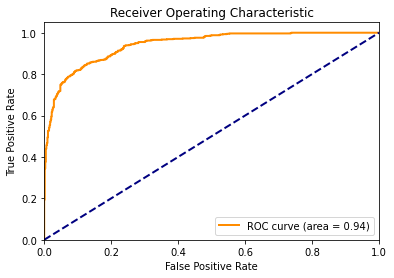

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3110298548839904
Validation Loss: 0.33053354642893273
Training Time (seconds): 2095.0242285728455
Inference Time (seconds): 45.42531943321228
Validation Accuracy: 0.85
Test Accuracy: 0.8516666666666667
Confusion Matrix:
 [[523  99]
 [ 79 499]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       622
           1       0.83      0.86      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9409595122331135
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
70/70 [==============================] - 106s 2s/step - loss: 0.1933 - accuracy: 0.9263 - val_loss: 0.3409 - val_accuracy: 0.8500
Epoch 2/200
70/70 [==============================] - 105s 2s/step - loss: 0.1825 - accuracy: 0.9299 - val_loss: 0.3365 - val_accuracy: 0.8482
Epoch 3/200
70/70 [==============================] - 105s 2s/step - loss: 0.1728 - accuracy: 0.9348 - val_loss: 0.3387 - val_accuracy: 0.8536
Epoch 4/200
70/70 [==============================] - 105s 2s/step - loss: 0.1699 - accuracy: 0.9375 - val_loss: 0.3379 - val_accuracy: 0.8554
Epoch 5/200
70/70 [==============================] - 105s 2s/step - loss: 0.1577 - accuracy: 0.9446 - val_loss: 0.3397 - val_accuracy: 0.8411
Epoch 6/200
70/70 [==============================] - 105s 2s/step - loss: 0.1527 - accuracy: 0.9464 - val_loss: 0.3360 - val_accuracy: 0.8589
Epoch 7/200
70/70 [==============================] - 105s 2s/step - loss: 0.1464 - accuracy: 0.9500 - val_loss: 0.3472 - val_accuracy: 0.8554
Epoch 

38/38 [==============================] - 45s 1s/step


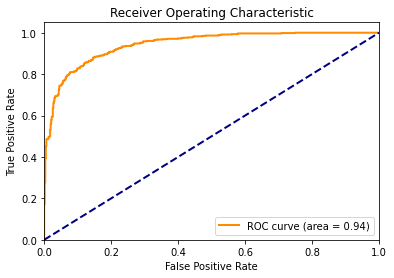

18/18 [==============================] - 21s 1s/step
Test Loss: 0.30975926037999824
Validation Loss: 0.33601143119732824
Training Time (seconds): 1160.3858528137207
Inference Time (seconds): 45.717808961868286
Validation Accuracy: 0.8589285714285714
Test Accuracy: 0.8641666666666666
Confusion Matrix:
 [[526  96]
 [ 67 511]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       622
           1       0.84      0.88      0.86       578

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.87      0.86      0.86      1200

ROC AUC Score: 0.943026179641518
Metrics saved successfully


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+ Conv2D + GlobalAveragePooling2D +Dropout+ Dense

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Conv2D layer
x = base_model.output
x = Conv2D(128, (3, 3), activation='relu')(x)  # Example Conv2D layer

# Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)

# Add Dropout layer
x = Dropout(0.5)(x)  # Example Dropout layer with dropout rate of 0.5

# Add Dense layers
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
70/70 [==============================] - 106s 2s/step - loss: 0.7017 - accuracy: 0.6388 - val_loss: 0.5141 - val_accuracy: 0.7393
Epoch 2/50
70/70 [==============================] - 105s 2s/step - loss: 0.5349 - accuracy: 0.7246 - val_loss: 0.4353 - val_accuracy: 0.7911
Epoch 3/50
70/70 [==============================] - 105s 2s/step - loss: 0.4491 - accuracy: 0.7857 - val_loss: 0.3838 - val_accuracy: 0.8214
Epoch 4/50
70/70 [==============================] - 105s 2s/step - loss: 0.3975 - accuracy: 0.8174 - val_loss: 0.3577 - val_accuracy: 0.8214
Epoch 5/50
70/70 [==============================] - 106s 2s/step - loss: 0.3548 - accuracy: 0.8402 - val_loss: 0.3278 - val_accuracy: 0.8357
Epoch 6/50
70/70 [==============================] - 106s 2s/step - loss: 0.3294 - accuracy: 0.8594 - val_loss: 0.3306 - val_accuracy: 0.8411
Epoch 7/50
70/70 [==============================] - 105s 2s/step - loss: 0.2886 - accuracy: 0.8705 - val_loss: 0.3380 - val_accuracy: 0.8429
Epoch 8/50
70

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 45s 1s/step


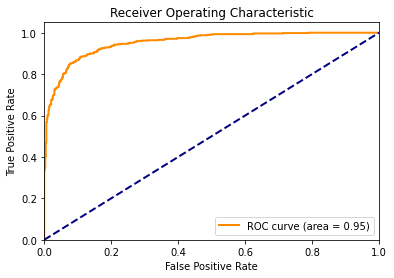

18/18 [==============================] - 21s 1s/step
Test Loss: 0.2836533247059314
Validation Loss: 0.2819991525384383
Training Time (seconds): 2007.8223857879639
Inference Time (seconds): 45.43063759803772
Validation Accuracy: 0.8714285714285714
Test Accuracy: 0.88
Confusion Matrix:
 [[537  85]
 [ 59 519]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       622
           1       0.86      0.90      0.88       578

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.88      0.88      0.88      1200

ROC AUC Score: 0.9532927602665806
Metrics saved successfully


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
70/70 [==============================] - 93s 1s/step - loss: 0.7152 - accuracy: 0.6214 - val_loss: 0.5101 - val_accuracy: 0.7357
Epoch 2/100
70/70 [==============================] - 104s 1s/step - loss: 0.4945 - accuracy: 0.7563 - val_loss: 0.4205 - val_accuracy: 0.7982
Epoch 3/100
70/70 [==============================] - 104s 1s/step - loss: 0.4269 - accuracy: 0.7991 - val_loss: 0.3823 - val_accuracy: 0.8196
Epoch 4/100
70/70 [==============================] - 104s 1s/step - loss: 0.3975 - accuracy: 0.8138 - val_loss: 0.3563 - val_accuracy: 0.8357
Epoch 5/100
70/70 [==============================] - 104s 1s/step - loss: 0.3589 - accuracy: 0.8429 - val_loss: 0.3455 - val_accuracy: 0.8429
Epoch 6/100
70/70 [==============================] - 104s 1s/step - loss: 0.3097 - accuracy: 0.8652 - val_loss: 0.3333 - val_accuracy: 0.8554
Epoch 7/100
70/70 [==============================] - 104s 1s/step - loss: 0.3000 - accuracy: 0.8705 - val_loss: 0.3204 - val_accuracy: 0.8500
Epoch 8

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 45s 1s/step


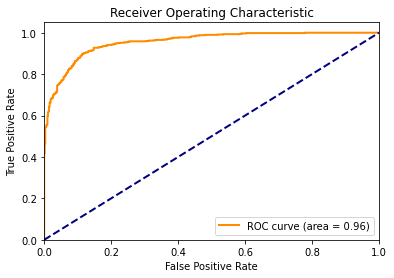

18/18 [==============================] - 21s 1s/step
Test Loss: 0.2981796329216335
Validation Loss: 0.2959431089894306
Training Time (seconds): 2592.965606689453
Inference Time (seconds): 44.715073585510254
Validation Accuracy: 0.8678571428571429
Test Accuracy: 0.8875
Confusion Matrix:
 [[529  93]
 [ 42 536]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       622
           1       0.85      0.93      0.89       578

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200

ROC AUC Score: 0.9552398224279308
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
70/70 [==============================] - 104s 1s/step - loss: 0.1178 - accuracy: 0.9598 - val_loss: 0.3095 - val_accuracy: 0.8625
Epoch 2/150
70/70 [==============================] - 104s 1s/step - loss: 0.1140 - accuracy: 0.9585 - val_loss: 0.3122 - val_accuracy: 0.8768
Epoch 3/150
70/70 [==============================] - 104s 1s/step - loss: 0.0974 - accuracy: 0.9688 - val_loss: 0.3147 - val_accuracy: 0.8732
Epoch 4/150
70/70 [==============================] - 104s 1s/step - loss: 0.0983 - accuracy: 0.9670 - val_loss: 0.3175 - val_accuracy: 0.8714
Epoch 5/150
70/70 [==============================] - 104s 1s/step - loss: 0.0898 - accuracy: 0.9719 - val_loss: 0.3277 - val_accuracy: 0.8768
Epoch 6/150
70/70 [==============================] - 104s 1s/step - loss: 0.0851 - accuracy: 0.9750 - val_loss: 0.3445 - val_accuracy: 0.8607
Training Time: 625.6190247535706 seconds


In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 45s 1s/step


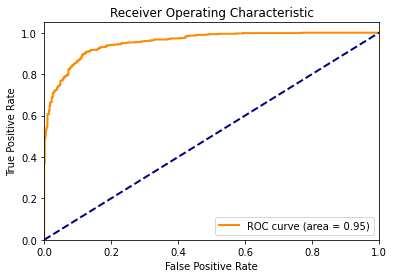

18/18 [==============================] - 21s 1s/step
Test Loss: 0.30421173313677663
Validation Loss: 0.30946840357074806
Training Time (seconds): 625.6190247535706
Inference Time (seconds): 45.43419694900513
Validation Accuracy: 0.8625
Test Accuracy: 0.8875
Confusion Matrix:
 [[539  83]
 [ 52 526]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       622
           1       0.86      0.91      0.89       578

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200

ROC AUC Score: 0.9546390146752857
Metrics saved successfully


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
70/70 [==============================] - 104s 1s/step - loss: 0.1079 - accuracy: 0.9652 - val_loss: 0.3277 - val_accuracy: 0.8643
Epoch 2/200
70/70 [==============================] - 104s 1s/step - loss: 0.1028 - accuracy: 0.9638 - val_loss: 0.3184 - val_accuracy: 0.8804
Epoch 3/200
70/70 [==============================] - 104s 1s/step - loss: 0.0961 - accuracy: 0.9652 - val_loss: 0.3067 - val_accuracy: 0.8786
Epoch 4/200
70/70 [==============================] - 104s 1s/step - loss: 0.0949 - accuracy: 0.9670 - val_loss: 0.3256 - val_accuracy: 0.8839
Epoch 5/200
70/70 [==============================] - 104s 1s/step - loss: 0.0907 - accuracy: 0.9688 - val_loss: 0.3205 - val_accuracy: 0.8696
Epoch 6/200
70/70 [==============================] - 104s 1s/step - loss: 0.0799 - accuracy: 0.9759 - val_loss: 0.3200 - val_accuracy: 0.8839
Epoch 7/200
70/70 [==============================] - 104s 1s/step - loss: 0.0725 - accuracy: 0.9804 - val_loss: 0.3166 - val_accuracy: 0.8768
Epoch 

38/38 [==============================] - 45s 1s/step


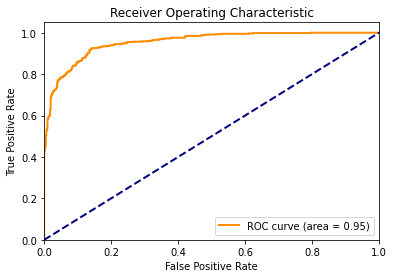

18/18 [==============================] - 21s 1s/step
Test Loss: 0.30366220824571166
Validation Loss: 0.3067079192471198
Training Time (seconds): 834.9020266532898
Inference Time (seconds): 44.91720175743103
Validation Accuracy: 0.8785714285714286
Test Accuracy: 0.8816666666666667
Confusion Matrix:
 [[545  77]
 [ 65 513]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       622
           1       0.87      0.89      0.88       578

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.88      0.88      0.88      1200

ROC AUC Score: 0.9544304008722838
Metrics saved successfully


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+LSTM+Dense

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, LSTM, Reshape  # Import Reshape layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from images using VGG16
vgg_output = base_model.output

# Add GlobalAveragePooling2D layer to pool spatial features
x = GlobalAveragePooling2D()(vgg_output)

# Reshape features for LSTM input
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for LSTM input

# Add LSTM layer
x = LSTM(128)(x)

# Add Dense layers for classification
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with LSTM and Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
70/70 [==============================] - 97s 1s/step - loss: 0.6462 - accuracy: 0.6536 - val_loss: 0.5894 - val_accuracy: 0.7232
Epoch 2/50
70/70 [==============================] - 104s 1s/step - loss: 0.5260 - accuracy: 0.7594 - val_loss: 0.4908 - val_accuracy: 0.7768
Epoch 3/50
70/70 [==============================] - 104s 1s/step - loss: 0.4229 - accuracy: 0.8165 - val_loss: 0.4361 - val_accuracy: 0.7875
Epoch 4/50
70/70 [==============================] - 104s 1s/step - loss: 0.3711 - accuracy: 0.8353 - val_loss: 0.4077 - val_accuracy: 0.7946
Epoch 5/50
70/70 [==============================] - 104s 1s/step - loss: 0.3347 - accuracy: 0.8562 - val_loss: 0.4238 - val_accuracy: 0.7696
Epoch 6/50
70/70 [==============================] - 104s 1s/step - loss: 0.3058 - accuracy: 0.8696 - val_loss: 0.3740 - val_accuracy: 0.8250
Epoch 7/50
70/70 [==============================] - 104s 1s/step - loss: 0.2823 - accuracy: 0.8853 - val_loss: 0.3639 - val_accuracy: 0.8250
Epoch 8/50
70/

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 45s 1s/step


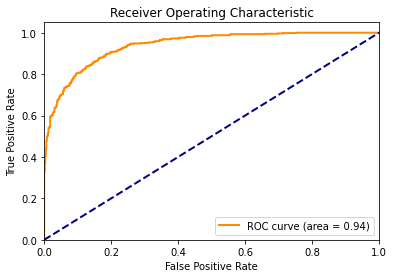

18/18 [==============================] - 21s 1s/step
Test Loss: 0.32367803662048117
Validation Loss: 0.34132114108647266
Training Time (seconds): 2179.150137424469
Inference Time (seconds): 44.7058322429657
Validation Accuracy: 0.8446428571428571
Test Accuracy: 0.8533333333333334
Confusion Matrix:
 [[521 101]
 [ 75 503]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       622
           1       0.83      0.87      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9383504489369041
Metrics saved successfully


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
70/70 [==============================] - 99s 1s/step - loss: 0.6418 - accuracy: 0.6379 - val_loss: 0.5740 - val_accuracy: 0.7321
Epoch 2/100
70/70 [==============================] - 104s 1s/step - loss: 0.5153 - accuracy: 0.7732 - val_loss: 0.4717 - val_accuracy: 0.7732
Epoch 3/100
70/70 [==============================] - 104s 1s/step - loss: 0.4147 - accuracy: 0.8205 - val_loss: 0.4144 - val_accuracy: 0.7982
Epoch 4/100
70/70 [==============================] - 104s 1s/step - loss: 0.3611 - accuracy: 0.8469 - val_loss: 0.3794 - val_accuracy: 0.8268
Epoch 5/100
70/70 [==============================] - 104s 1s/step - loss: 0.3204 - accuracy: 0.8679 - val_loss: 0.3564 - val_accuracy: 0.8268
Epoch 6/100
70/70 [==============================] - 104s 1s/step - loss: 0.2954 - accuracy: 0.8871 - val_loss: 0.3470 - val_accuracy: 0.8286
Epoch 7/100
70/70 [==============================] - 104s 1s/step - loss: 0.2711 - accuracy: 0.8946 - val_loss: 0.3399 - val_accuracy: 0.8375
Epoch 8

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 45s 1s/step


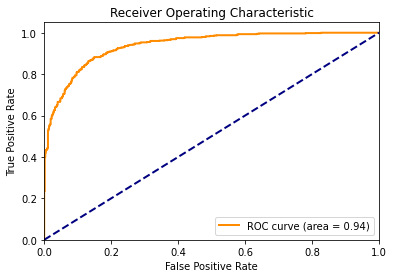

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3373908852931136
Validation Loss: 0.3173066115062974
Training Time (seconds): 1764.4109108448029
Inference Time (seconds): 44.85968613624573
Validation Accuracy: 0.8446428571428571
Test Accuracy: 0.8541666666666666
Confusion Matrix:
 [[499 123]
 [ 52 526]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85       622
           1       0.81      0.91      0.86       578

    accuracy                           0.85      1200
   macro avg       0.86      0.86      0.85      1200
weighted avg       0.86      0.85      0.85      1200

ROC AUC Score: 0.9384923063229452
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
70/70 [==============================] - 98s 1s/step - loss: 0.6393 - accuracy: 0.6357 - val_loss: 0.5758 - val_accuracy: 0.7393
Epoch 2/150
70/70 [==============================] - 104s 1s/step - loss: 0.5072 - accuracy: 0.7772 - val_loss: 0.4691 - val_accuracy: 0.7750
Epoch 3/150
70/70 [==============================] - 104s 1s/step - loss: 0.4088 - accuracy: 0.8219 - val_loss: 0.4156 - val_accuracy: 0.8018
Epoch 4/150
70/70 [==============================] - 104s 1s/step - loss: 0.3563 - accuracy: 0.8500 - val_loss: 0.3790 - val_accuracy: 0.8143
Epoch 5/150
70/70 [==============================] - 104s 1s/step - loss: 0.3185 - accuracy: 0.8754 - val_loss: 0.3603 - val_accuracy: 0.8321
Epoch 6/150
70/70 [==============================] - 104s 1s/step - loss: 0.2938 - accuracy: 0.8772 - val_loss: 0.3585 - val_accuracy: 0.8232
Epoch 7/150
70/70 [==============================] - 104s 1s/step - loss: 0.2691 - accuracy: 0.8893 - val_loss: 0.3335 - val_accuracy: 0.8429
Epoch 8

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 44s 1s/step


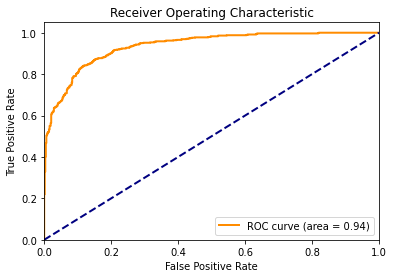

18/18 [==============================] - 21s 1s/step
Test Loss: 0.33056532345248674
Validation Loss: 0.31797499827456976
Training Time (seconds): 1967.319085597992
Inference Time (seconds): 45.19919466972351
Validation Accuracy: 0.8553571428571428
Test Accuracy: 0.8575
Confusion Matrix:
 [[524  98]
 [ 73 505]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       622
           1       0.84      0.87      0.86       578

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

ROC AUC Score: 0.9357942344707886
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
70/70 [==============================] - 104s 1s/step - loss: 0.1528 - accuracy: 0.9433 - val_loss: 0.3321 - val_accuracy: 0.8500
Epoch 2/200
70/70 [==============================] - 104s 1s/step - loss: 0.1458 - accuracy: 0.9509 - val_loss: 0.3479 - val_accuracy: 0.8536
Epoch 3/200
70/70 [==============================] - 104s 1s/step - loss: 0.1325 - accuracy: 0.9571 - val_loss: 0.3298 - val_accuracy: 0.8464
Epoch 4/200
70/70 [==============================] - 104s 1s/step - loss: 0.1227 - accuracy: 0.9638 - val_loss: 0.3243 - val_accuracy: 0.8607
Epoch 5/200
70/70 [==============================] - 104s 1s/step - loss: 0.1150 - accuracy: 0.9647 - val_loss: 0.3264 - val_accuracy: 0.8571
Epoch 6/200
70/70 [==============================] - 104s 1s/step - loss: 0.1069 - accuracy: 0.9701 - val_loss: 0.3330 - val_accuracy: 0.8589
Epoch 7/200
70/70 [==============================] - 104s 1s/step - loss: 0.1002 - accuracy: 0.9719 - val_loss: 0.3529 - val_accuracy: 0.8429
Epoch 

38/38 [==============================] - 44s 1s/step


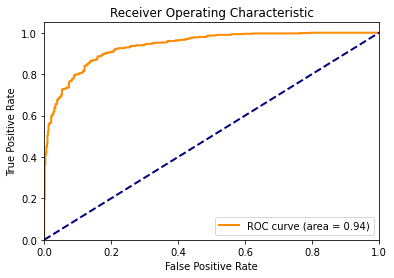

18/18 [==============================] - 21s 1s/step
Test Loss: 0.33670971887366546
Validation Loss: 0.32426839481844644
Training Time (seconds): 934.6174159049988
Inference Time (seconds): 44.97389531135559
Validation Accuracy: 0.8607142857142858
Test Accuracy: 0.8583333333333333
Confusion Matrix:
 [[525  97]
 [ 73 505]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       622
           1       0.84      0.87      0.86       578

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

ROC AUC Score: 0.9370598248756661
Metrics saved successfully


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+GRU+Dense

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
70/70 [==============================] - 95s 1s/step - loss: 0.9425 - accuracy: 0.5616 - val_loss: 0.6137 - val_accuracy: 0.6625
Epoch 2/50
70/70 [==============================] - 104s 1s/step - loss: 0.5570 - accuracy: 0.7138 - val_loss: 0.4899 - val_accuracy: 0.7589
Epoch 3/50
70/70 [==============================] - 104s 1s/step - loss: 0.4599 - accuracy: 0.7839 - val_loss: 0.4537 - val_accuracy: 0.7625
Epoch 4/50
70/70 [==============================] - 104s 1s/step - loss: 0.4074 - accuracy: 0.8107 - val_loss: 0.4185 - val_accuracy: 0.7768
Epoch 5/50
70/70 [==============================] - 104s 1s/step - loss: 0.3785 - accuracy: 0.8308 - val_loss: 0.4012 - val_accuracy: 0.8268
Epoch 6/50
70/70 [==============================] - 104s 1s/step - loss: 0.3550 - accuracy: 0.8451 - val_loss: 0.3857 - val_accuracy: 0.8161
Epoch 7/50
70/70 [==============================] - 104s 1s/step - loss: 0.3325 - accuracy: 0.8576 - val_loss: 0.3715 - val_accuracy: 0.8357
Epoch 8/50
70/

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

38/38 [==============================] - 45s 1s/step


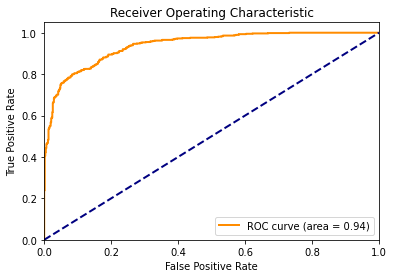

18/18 [==============================] - 21s 1s/step
Test Loss: 0.31458534727716836
Validation Loss: 0.32130711552563923
Training Time (seconds): 2799.361836194992
Inference Time (seconds): 45.13542819023132
Validation Accuracy: 0.8571428571428571
Test Accuracy: 0.845
Confusion Matrix:
 [[523  99]
 [ 87 491]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       622
           1       0.83      0.85      0.84       578

    accuracy                           0.84      1200
   macro avg       0.84      0.85      0.84      1200
weighted avg       0.85      0.84      0.85      1200

ROC AUC Score: 0.9384923063229454
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
70/70 [==============================] - 104s 1s/step - loss: 0.2095 - accuracy: 0.9268 - val_loss: 0.3213 - val_accuracy: 0.8464
Epoch 2/100
70/70 [==============================] - 104s 1s/step - loss: 0.2070 - accuracy: 0.9281 - val_loss: 0.3180 - val_accuracy: 0.8518
Epoch 3/100
70/70 [==============================] - 104s 1s/step - loss: 0.1993 - accuracy: 0.9330 - val_loss: 0.3231 - val_accuracy: 0.8518
Epoch 4/100
70/70 [==============================] - 104s 1s/step - loss: 0.1983 - accuracy: 0.9304 - val_loss: 0.3289 - val_accuracy: 0.8446
Epoch 5/100
70/70 [==============================] - 104s 1s/step - loss: 0.1957 - accuracy: 0.9263 - val_loss: 0.3172 - val_accuracy: 0.8607
Epoch 6/100
70/70 [==============================] - 104s 1s/step - loss: 0.1847 - accuracy: 0.9371 - val_loss: 0.3187 - val_accuracy: 0.8607
Epoch 7/100
70/70 [==============================] - 104s 1s/step - loss: 0.1873 - accuracy: 0.9344 - val_loss: 0.3233 - val_accuracy: 0.8607
Epoch 

38/38 [==============================] - 45s 1s/step


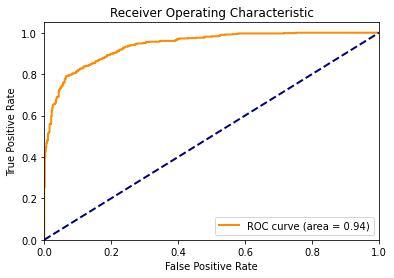

18/18 [==============================] - 21s 1s/step
Test Loss: 0.311647100379215
Validation Loss: 0.3172046378021098
Training Time (seconds): 1041.7597062587738
Inference Time (seconds): 45.27426862716675
Validation Accuracy: 0.8607142857142858
Test Accuracy: 0.8516666666666667
Confusion Matrix:
 [[529  93]
 [ 85 493]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       622
           1       0.84      0.85      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9396132578244083
Metrics saved successfully


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
70/70 [==============================] - 94s 1s/step - loss: 0.6151 - accuracy: 0.6795 - val_loss: 0.5379 - val_accuracy: 0.7304
Epoch 2/150
70/70 [==============================] - 104s 1s/step - loss: 0.4595 - accuracy: 0.7723 - val_loss: 0.4677 - val_accuracy: 0.7625
Epoch 3/150
70/70 [==============================] - 104s 1s/step - loss: 0.4094 - accuracy: 0.8071 - val_loss: 0.4405 - val_accuracy: 0.7911
Epoch 4/150
70/70 [==============================] - 104s 1s/step - loss: 0.3837 - accuracy: 0.8268 - val_loss: 0.4284 - val_accuracy: 0.7893
Epoch 5/150
70/70 [==============================] - 104s 1s/step - loss: 0.3558 - accuracy: 0.8415 - val_loss: 0.4006 - val_accuracy: 0.8036
Epoch 6/150
70/70 [==============================] - 104s 1s/step - loss: 0.3389 - accuracy: 0.8513 - val_loss: 0.4053 - val_accuracy: 0.7893
Epoch 7/150
70/70 [==============================] - 104s 1s/step - loss: 0.3247 - accuracy: 0.8589 - val_loss: 0.3807 - val_accuracy: 0.8232
Epoch 8

38/38 [==============================] - 37s 968ms/step


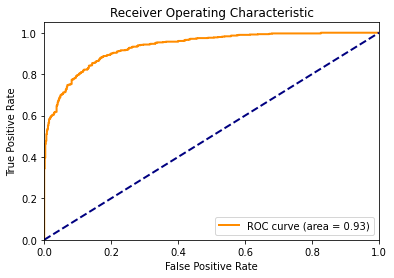

18/18 [==============================] - 19s 1s/step
Test Loss: 0.3294207451409713
Validation Loss: 0.34268659452974853
Training Time (seconds): 1966.7274732589722
Inference Time (seconds): 37.024309396743774
Validation Accuracy: 0.8339285714285715
Test Accuracy: 0.8516666666666667
Confusion Matrix:
 [[520 102]
 [ 76 502]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       622
           1       0.83      0.87      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9334827935335285
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
70/70 [==============================] - 100s 1s/step - loss: 0.2489 - accuracy: 0.9018 - val_loss: 0.3403 - val_accuracy: 0.8339
Epoch 2/200
70/70 [==============================] - 104s 1s/step - loss: 0.2442 - accuracy: 0.9062 - val_loss: 0.3381 - val_accuracy: 0.8500
Epoch 3/200
70/70 [==============================] - 104s 1s/step - loss: 0.2334 - accuracy: 0.9103 - val_loss: 0.3551 - val_accuracy: 0.8250
Epoch 4/200
70/70 [==============================] - 104s 1s/step - loss: 0.2310 - accuracy: 0.9040 - val_loss: 0.3394 - val_accuracy: 0.8339
Epoch 5/200
70/70 [==============================] - 104s 1s/step - loss: 0.2230 - accuracy: 0.9147 - val_loss: 0.3369 - val_accuracy: 0.8482
Epoch 6/200
70/70 [==============================] - 104s 1s/step - loss: 0.2141 - accuracy: 0.9223 - val_loss: 0.3398 - val_accuracy: 0.8321
Epoch 7/200
70/70 [==============================] - 104s 1s/step - loss: 0.2075 - accuracy: 0.9281 - val_loss: 0.3303 - val_accuracy: 0.8500
Epoch 

38/38 [==============================] - 45s 1s/step


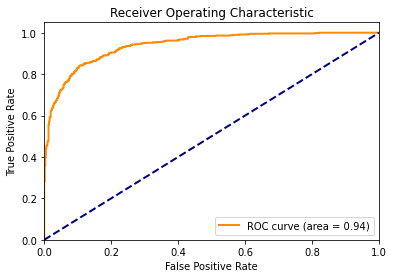

18/18 [==============================] - 21s 1s/step
Test Loss: 0.31212861710226336
Validation Loss: 0.33031987161309745
Training Time (seconds): 1764.6832451820374
Inference Time (seconds): 45.01034593582153
Validation Accuracy: 0.8535714285714285
Test Accuracy: 0.8616666666666667
Confusion Matrix:
 [[540  82]
 [ 84 494]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       622
           1       0.86      0.85      0.86       578

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200

ROC AUC Score: 0.9398469052837704
Metrics saved successfully


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Attention Mechanism+Dense

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Attention, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Apply attention mechanism
att = Attention()([x, x])

# Concatenate attention weights with original features
x = Concatenate()([x, att])

# Add Dense layers
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
70/70 [==============================] - 96s 1s/step - loss: 0.8637 - accuracy: 0.5625 - val_loss: 0.6349 - val_accuracy: 0.6607
Epoch 2/50
70/70 [==============================] - 104s 1s/step - loss: 0.5811 - accuracy: 0.6960 - val_loss: 0.5503 - val_accuracy: 0.7107
Epoch 3/50
70/70 [==============================] - 104s 1s/step - loss: 0.5086 - accuracy: 0.7518 - val_loss: 0.5176 - val_accuracy: 0.7357
Epoch 4/50
70/70 [==============================] - 104s 1s/step - loss: 0.4694 - accuracy: 0.7674 - val_loss: 0.4650 - val_accuracy: 0.7696
Epoch 5/50
70/70 [==============================] - 104s 1s/step - loss: 0.4342 - accuracy: 0.7871 - val_loss: 0.4531 - val_accuracy: 0.7804
Epoch 6/50
70/70 [==============================] - 104s 1s/step - loss: 0.3970 - accuracy: 0.8094 - val_loss: 0.5177 - val_accuracy: 0.7679
Epoch 7/50
70/70 [==============================] - 104s 1s/step - loss: 0.3793 - accuracy: 0.8397 - val_loss: 0.4297 - val_accuracy: 0.7982
Epoch 8/50
70/

38/38 [==============================] - 45s 1s/step


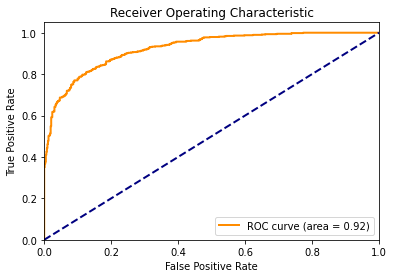

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3517721002230366
Validation Loss: 0.38143080057215695
Training Time (seconds): 2280.9172830581665
Inference Time (seconds): 44.87693738937378
Validation Accuracy: 0.8267857142857142
Test Accuracy: 0.8333333333333334
Confusion Matrix:
 [[497 125]
 [ 75 503]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       622
           1       0.80      0.87      0.83       578

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.84      0.83      0.83      1200

ROC AUC Score: 0.9243302106164956
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
70/70 [==============================] - 104s 1s/step - loss: 0.2978 - accuracy: 0.8634 - val_loss: 0.3773 - val_accuracy: 0.8179
Epoch 2/100
70/70 [==============================] - 104s 1s/step - loss: 0.3012 - accuracy: 0.8616 - val_loss: 0.3935 - val_accuracy: 0.8054
Epoch 3/100
70/70 [==============================] - 104s 1s/step - loss: 0.2847 - accuracy: 0.8741 - val_loss: 0.4427 - val_accuracy: 0.7875
Epoch 4/100
70/70 [==============================] - 104s 1s/step - loss: 0.2967 - accuracy: 0.8719 - val_loss: 0.3741 - val_accuracy: 0.8375
Epoch 5/100
70/70 [==============================] - 104s 1s/step - loss: 0.3241 - accuracy: 0.8504 - val_loss: 0.4097 - val_accuracy: 0.7911
Epoch 6/100
70/70 [==============================] - 104s 1s/step - loss: 0.2868 - accuracy: 0.8683 - val_loss: 0.3729 - val_accuracy: 0.8250
Epoch 7/100
70/70 [==============================] - 104s 1s/step - loss: 0.2676 - accuracy: 0.8920 - val_loss: 0.3982 - val_accuracy: 0.7982
Epoch 

38/38 [==============================] - 45s 1s/step


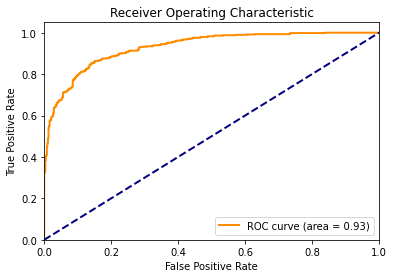

18/18 [==============================] - 21s 1s/step
Test Loss: 0.33435488380751277
Validation Loss: 0.35983239942526773
Training Time (seconds): 1458.1933751106262
Inference Time (seconds): 45.02958369255066
Validation Accuracy: 0.8321428571428572
Test Accuracy: 0.8525
Confusion Matrix:
 [[530  92]
 [ 85 493]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       622
           1       0.84      0.85      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9302131198611466
Metrics saved successfully


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
70/70 [==============================] - 94s 1s/step - loss: 0.9241 - accuracy: 0.5746 - val_loss: 0.6342 - val_accuracy: 0.6714
Epoch 2/150
70/70 [==============================] - 105s 2s/step - loss: 0.5691 - accuracy: 0.7013 - val_loss: 0.5387 - val_accuracy: 0.7107
Epoch 3/150
70/70 [==============================] - 105s 2s/step - loss: 0.4727 - accuracy: 0.7643 - val_loss: 0.5041 - val_accuracy: 0.7268
Epoch 4/150
70/70 [==============================] - 104s 1s/step - loss: 0.4594 - accuracy: 0.7705 - val_loss: 0.4720 - val_accuracy: 0.7554
Epoch 5/150
70/70 [==============================] - 104s 1s/step - loss: 0.4474 - accuracy: 0.7826 - val_loss: 0.5812 - val_accuracy: 0.6875
Epoch 6/150
70/70 [==============================] - 104s 1s/step - loss: 0.4026 - accuracy: 0.8103 - val_loss: 0.4478 - val_accuracy: 0.7625
Epoch 7/150
70/70 [==============================] - 104s 1s/step - loss: 0.3747 - accuracy: 0.8286 - val_loss: 0.4137 - val_accuracy: 0.7911
Epoch 8

38/38 [==============================] - 45s 1s/step


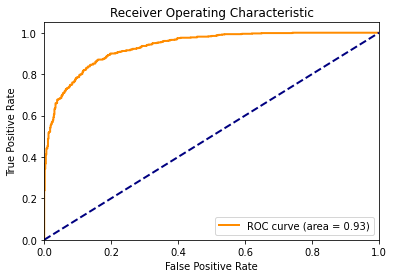

18/18 [==============================] - 21s 1s/step
Test Loss: 0.3273556977823469
Validation Loss: 0.352838202748004
Training Time (seconds): 3522.828715324402
Inference Time (seconds): 45.1470205783844
Validation Accuracy: 0.8321428571428572
Test Accuracy: 0.8533333333333334
Confusion Matrix:
 [[527  95]
 [ 81 497]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       622
           1       0.84      0.86      0.85       578

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

ROC AUC Score: 0.9335008733964554
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
70/70 [==============================] - 93s 1s/step - loss: 0.8118 - accuracy: 0.5915 - val_loss: 0.6387 - val_accuracy: 0.6554
Epoch 2/200
70/70 [==============================] - 104s 1s/step - loss: 0.5523 - accuracy: 0.7143 - val_loss: 0.5509 - val_accuracy: 0.7161
Epoch 3/200
70/70 [==============================] - 103s 1s/step - loss: 0.4902 - accuracy: 0.7442 - val_loss: 0.5012 - val_accuracy: 0.7411
Epoch 4/200
70/70 [==============================] - 104s 1s/step - loss: 0.4354 - accuracy: 0.7915 - val_loss: 0.5066 - val_accuracy: 0.7518
Epoch 5/200
70/70 [==============================] - 104s 1s/step - loss: 0.4304 - accuracy: 0.7964 - val_loss: 0.4552 - val_accuracy: 0.7750
Epoch 6/200
70/70 [==============================] - 104s 1s/step - loss: 0.3855 - accuracy: 0.8152 - val_loss: 0.4716 - val_accuracy: 0.7821
Epoch 7/200
70/70 [==============================] - 104s 1s/step - loss: 0.3777 - accuracy: 0.8321 - val_loss: 0.4348 - val_accuracy: 0.7839
Epoch 8

38/38 [==============================] - 38s 986ms/step


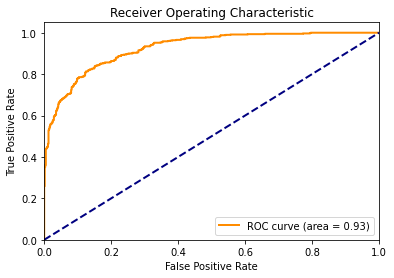

18/18 [==============================] - 20s 1s/step
Test Loss: 0.3441880707758224
Validation Loss: 0.3876874979831136
Training Time (seconds): 2482.7629079818726
Inference Time (seconds): 48.5440571308136
Validation Accuracy: 0.8303571428571429
Test Accuracy: 0.8408333333333333
Confusion Matrix:
 [[521 101]
 [ 90 488]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       622
           1       0.83      0.84      0.84       578

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.84      0.84      0.84      1200

ROC AUC Score: 0.9259546167625364
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Capsule+Dense

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Capsule Network
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Reshape((-1, 512))(x)  # Reshape to 3D tensor for Capsule Network
x = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
x = Flatten()(x)  # Flatten the output
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 0.5341 - accuracy: 0.7406

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_1000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_1000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")